# Clean Data

In [97]:
# set test size for models
test_size = 0.1

In [98]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [99]:
df = pd.read_csv(os.path.join("raw_data", "dress_raw.csv"))
df.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [100]:
len(df)

500

In [92]:
# Round rating:
# df["Rating"] = df["Rating"].round()
# df.head()

In [93]:
df["Decoration"] = df["Decoration"].fillna("nothing")

In [94]:
df = df.drop(columns = "Dress_ID")

In [95]:
df = df.loc[~(df["Rating"]==0)].reset_index(drop=True)
df.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
2,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0
3,party,Average,5.0,free,Summer,o-neck,full,natural,polyster,broadcloth,lace,solid,0
4,sexy,Low,4.7,M,Winter,o-neck,threequarter,NaN,NaN,chiffon,lace,print,1


In [96]:
df.isnull().sum(axis=0)

Style               0
Price               2
Rating              0
Size                0
Season              1
NeckLine            3
SleeveLength        1
waiseline          66
Material          101
FabricType        203
Decoration          0
Pattern Type       81
Recommendation      0
dtype: int64

In [9]:
df.columns.tolist()

['Style',
 'Price',
 'Rating',
 'Size',
 'Season',
 'NeckLine',
 'SleeveLength',
 'waiseline',
 'Material',
 'FabricType',
 'Decoration',
 'Pattern Type',
 'Recommendation']

In [10]:
# correct WaistLine typo
df.rename(columns={"waiseline":'WaistLine'}, inplace=True)

In [11]:
cat_columns = ['Style', 'Price','Size', 'Season', 'NeckLine', 'SleeveLength', 'WaistLine', 'Material', 'FabricType', 'Decoration', 'Pattern Type']
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype(str).str.lower())
df.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,WaistLine,Material,FabricType,Decoration,Pattern Type,Recommendation
0,sexy,low,5.0,m,summer,o-neck,sleevless,empire,nan,chiffon,ruffles,animal,1
1,brief,average,5.0,l,spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
2,cute,low,4.0,m,summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0
3,party,average,5.0,free,summer,o-neck,full,natural,polyster,broadcloth,lace,solid,0
4,sexy,low,5.0,m,winter,o-neck,threequarter,nan,nan,chiffon,lace,print,1


In [12]:
# correct typos
df["Price"] = df["Price"].replace("average", "medium")

In [13]:
# Season column: correct typos:
df["Season"] = df["Season"].replace("automn", "autumn")

In [14]:
# SleeveLength Column: Correct typos:
df["SleeveLength"] = df["SleeveLength"].replace("cap-sleeves", "capsleeves")
df["SleeveLength"] = df["SleeveLength"].replace("half", "halfsleeve")
df["SleeveLength"] = df["SleeveLength"].replace("sleveless", "sleeveless")
df["SleeveLength"] = df["SleeveLength"].replace("sleevless", "sleeveless")
df["SleeveLength"] = df["SleeveLength"].replace("sleeevless", "sleeveless")
df["SleeveLength"] = df["SleeveLength"].replace("sleeevless", "sleeveless")
df["SleeveLength"] = df["SleeveLength"].replace("thressqatar", "threequarter")
df["SleeveLength"] = df["SleeveLength"].replace("urndowncollor", "turndowncollar")
df["SleeveLength"] = df["SleeveLength"].replace("turndowncollor", "turndowncollar")
df["SleeveLength"] = df["SleeveLength"].replace("leapord", "leopard")

In [15]:
# Fabric Type: correct typos:
df["FabricType"] = df["FabricType"].replace("shiffon", "chiffon")
df["FabricType"] = df["FabricType"].replace("flannael", "flannel")

In [16]:
df.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,WaistLine,Material,FabricType,Decoration,Pattern Type,Recommendation
0,sexy,low,5.0,m,summer,o-neck,sleeveless,empire,nan,chiffon,ruffles,animal,1
1,brief,medium,5.0,l,spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
2,cute,low,4.0,m,summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0
3,party,medium,5.0,free,summer,o-neck,full,natural,polyster,broadcloth,lace,solid,0
4,sexy,low,5.0,m,winter,o-neck,threequarter,nan,nan,chiffon,lace,print,1


In [17]:
df.columns.tolist()

['Style',
 'Price',
 'Rating',
 'Size',
 'Season',
 'NeckLine',
 'SleeveLength',
 'WaistLine',
 'Material',
 'FabricType',
 'Decoration',
 'Pattern Type',
 'Recommendation']

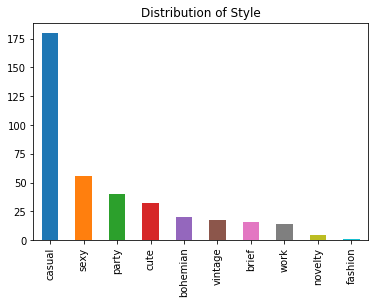

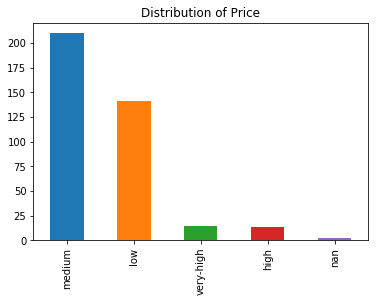

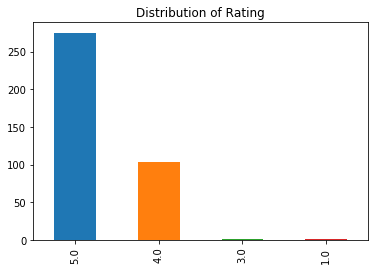

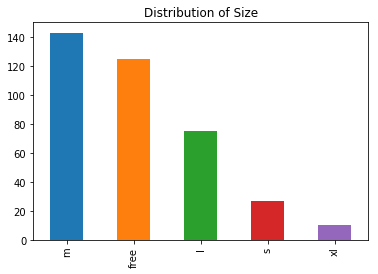

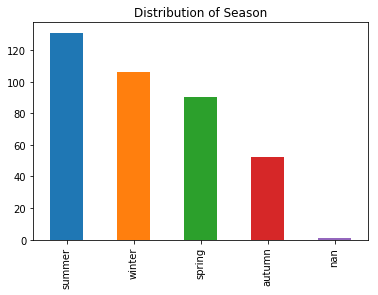

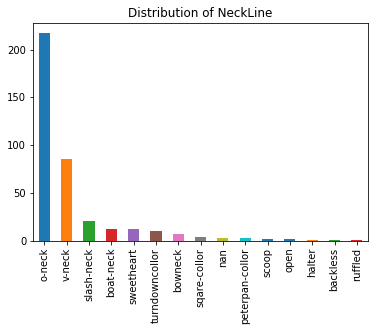

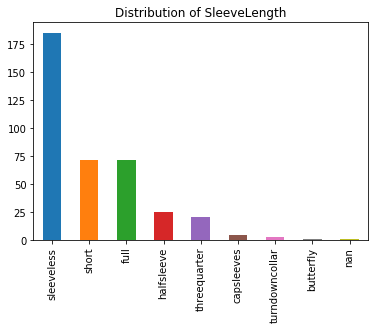

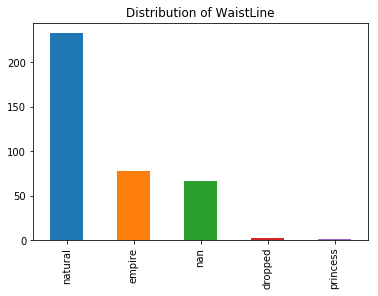

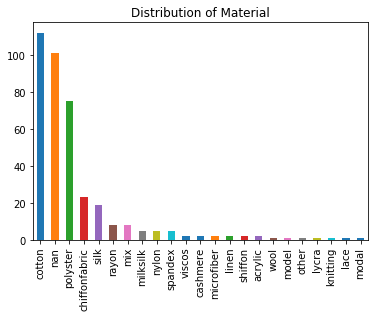

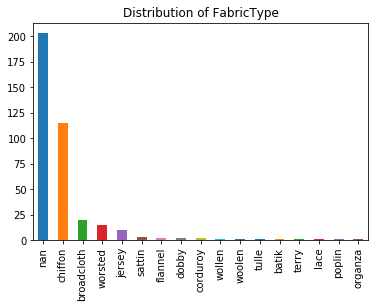

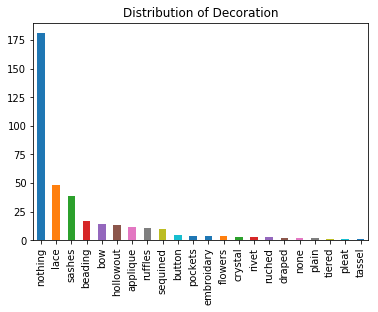

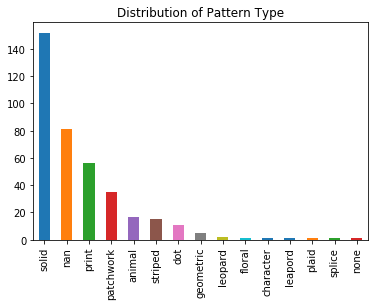

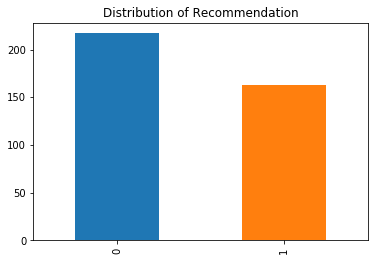

In [18]:
for col in df.columns.values:
    df[col].value_counts().plot(kind='bar')
    plt.title("Distribution of " + col)
    plt.show()

In [19]:
# reduce 10 levels in style feature to 5 levels
df["Style"]= df["Style"].replace("sexy", "special_occasion")
df["Style"]= df["Style"].replace("party", "special_occasion")
df["Style"]= df["Style"].replace("novelty", "other")
df["Style"]= df["Style"].replace("bohemian", "boho_vintage")
df["Style"]= df["Style"].replace("vintage", "boho_vintage")
df["Style"]= df["Style"].replace("fashion", "other")
df["Style"]= df["Style"].replace("brief", "casual")
df["Style"]= df["Style"].replace("cute", "casual")

In [20]:
df[df["Price"]=="nan"]

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,WaistLine,Material,FabricType,Decoration,Pattern Type,Recommendation
186,special_occasion,nan,5.0,free,winter,o-neck,sleeveless,empire,nan,nan,embroidary,nan,1
187,special_occasion,nan,4.0,l,summer,nan,full,nan,nan,nan,nothing,nan,1


In [21]:
# fill two "nan" values in Price with the most common value--"medium"
df["Price"] = df["Price"].replace("nan","medium")

In [22]:
df[df["Season"]=="nan"]

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,WaistLine,Material,FabricType,Decoration,Pattern Type,Recommendation
193,special_occasion,medium,5.0,l,nan,sweetheart,sleeveless,empire,nan,nan,pleat,nan,1


In [23]:
# fill the "nan" value in Season with the most common value--"summer"
df["Season"] = df["Season"].replace("nan", "summer")

In [24]:
df[df["NeckLine"]=="nan"]

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,WaistLine,Material,FabricType,Decoration,Pattern Type,Recommendation
187,special_occasion,medium,4.0,l,summer,nan,full,nan,nan,nan,nothing,nan,1
244,casual,medium,4.0,m,summer,nan,nan,natural,cotton,chiffon,nothing,solid,0
293,casual,low,5.0,l,summer,nan,sleeveless,nan,cotton,nan,nothing,solid,1


In [25]:
# fill three "nan" values in NeckLine with the most common value--"o-neck"
df["NeckLine"] = df["NeckLine"].replace("nan", "o-neck")

In [26]:
# There are 14 levels in feature "NeckLine". Reduce it to 7:
df["NeckLine"] = df["NeckLine"].replace("bowneck", "bow_and_ruffle")
df["NeckLine"] = df["NeckLine"].replace("ruffled", "bow_and_ruffle")
df["NeckLine"] = df["NeckLine"].replace("slash-neck", "slash_and_boat")
df["NeckLine"] = df["NeckLine"].replace("boat-neck", "slash_and_boat")
df["NeckLine"] = df["NeckLine"].replace("sweetheart", "sweetheart_and_square")
df["NeckLine"] = df["NeckLine"].replace("sqare-collor", "sweetheart_and_square")
df["NeckLine"] = df["NeckLine"].replace("backless", "other")
df["NeckLine"] = df["NeckLine"].replace("peterpan-collor", "other")
df["NeckLine"] = df["NeckLine"].replace("halter", "other")
df["NeckLine"] = df["NeckLine"].replace("open", "other")
df["NeckLine"] = df["NeckLine"].replace("scoop", "other")

In [27]:
df[df["SleeveLength"]=="nan"]

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,WaistLine,Material,FabricType,Decoration,Pattern Type,Recommendation
244,casual,medium,4.0,m,summer,o-neck,nan,natural,cotton,chiffon,nothing,solid,0


In [28]:
# fill the "nan" value in SleeveLength with the most common value--"sleeveless"
df["SleeveLength"] = df["SleeveLength"].replace("nan", "sleeveless")

In [29]:
df["SleeveLength"].unique()

array(['sleeveless', 'full', 'butterfly', 'threequarter', 'short',
       'halfsleeve', 'turndowncollar', 'capsleeves'], dtype=object)

In [30]:
# There are 8 levels in feature "SleeveLength". Reduce it to 5:
df["SleeveLength"] = df["SleeveLength"].replace("turndowncollar", "full")
df["SleeveLength"] = df["SleeveLength"].replace("butterfly", "halfsleeve")
df["SleeveLength"] = df["SleeveLength"].replace("capsleeves", "short")

In [31]:
df[df["WaistLine"]=="nan"]

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,WaistLine,Material,FabricType,Decoration,Pattern Type,Recommendation
4,special_occasion,low,5.0,m,winter,o-neck,threequarter,nan,nan,chiffon,lace,print,1
6,casual,low,5.0,m,summer,slash_and_boat,short,nan,cotton,nan,sashes,solid,0
7,casual,medium,5.0,l,spring,o-neck,short,nan,cotton,nan,sashes,solid,1
10,special_occasion,medium,4.0,l,autumn,o-neck,full,nan,cotton,nan,beading,solid,0
20,special_occasion,high,5.0,m,spring,o-neck,threequarter,nan,nan,nan,nothing,print,0
33,casual,low,4.0,free,summer,o-neck,sleeveless,nan,milksilk,nan,nothing,animal,0
49,casual,low,5.0,l,spring,o-neck,short,nan,chiffonfabric,chiffon,bow,dot,0
50,casual,medium,5.0,xl,winter,slash_and_boat,full,nan,cotton,nan,nothing,geometric,1
51,boho_vintage,very-high,5.0,free,winter,v-neck,sleeveless,nan,polyster,nan,nothing,nan,1
56,casual,low,5.0,l,summer,slash_and_boat,short,nan,nan,chiffon,nothing,patchwork,1


In [32]:
# fill the "nan" value in WaistLine with the most common value--"natural"
df["WaistLine"] = df["WaistLine"].replace("nan", "natural")

In [33]:
# There are 4 levels in feature "SleeveLength". Reduce it to 3:
df["WaistLine"] = df["WaistLine"].replace("princess", "empire")

In [34]:
df[df["Material"]=="nan"]

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,WaistLine,Material,FabricType,Decoration,Pattern Type,Recommendation
0,special_occasion,low,5.0,m,summer,o-neck,sleeveless,empire,nan,chiffon,ruffles,animal,1
4,special_occasion,low,5.0,m,winter,o-neck,threequarter,natural,nan,chiffon,lace,print,1
8,boho_vintage,medium,5.0,free,autumn,o-neck,full,natural,nan,nan,hollowout,patchwork,1
11,casual,low,4.0,m,summer,o-neck,sleeveless,natural,nan,chiffon,nothing,solid,0
14,special_occasion,medium,5.0,m,spring,o-neck,sleeveless,natural,nan,nan,nothing,solid,1
19,casual,medium,4.0,l,spring,o-neck,sleeveless,empire,nan,nan,bow,solid,1
20,special_occasion,high,5.0,m,spring,o-neck,threequarter,natural,nan,nan,nothing,print,0
22,boho_vintage,medium,5.0,free,winter,o-neck,full,natural,nan,chiffon,nothing,print,1
32,special_occasion,low,5.0,free,summer,v-neck,sleeveless,empire,nan,chiffon,nothing,animal,1
37,special_occasion,low,5.0,l,autumn,o-neck,sleeveless,natural,nan,nan,lace,solid,1


In [35]:
# There are 23 levels in feature "Material". Reduce it to 11:
df["Material"] = df["Material"].replace("chiffonfabric", "chiffon")
df["Material"] = df["Material"].replace("shiffon", "chiffon")
df["Material"] = df["Material"].replace("milksilk", "silk")
df["Material"] = df["Material"].replace("model", "modal")
df["Material"] = df["Material"].replace("wool", "wool_and_cashmere")
df["Material"] = df["Material"].replace("cashmere", "wool_and_cashmere")
df["Material"] = df["Material"].replace("knitting", "knit")
df["Material"] = df["Material"].replace("spandex", "knit")
df["Material"] = df["Material"].replace("lycra", "knit")
df["Material"] = df["Material"].replace("modal", "cotton")

other_materials = ["lace", "microfiber", "linen", "viscos", "acrylic"]
for string in other_materials:
    df["Material"] = df["Material"].replace(string, "other")

In [36]:
df["FabricType"].unique()

array(['chiffon', 'broadcloth', 'jersey', 'nan', 'batik', 'flannel',
       'worsted', 'woolen', 'dobby', 'organza', 'lace', 'sattin', 'tulle',
       'poplin', 'corduroy', 'wollen', 'terry'], dtype=object)

In [37]:
# There are 17 levels in feature "FabricType". Reduce it to 6:
df["FabricType"] = df["FabricType"].replace("woolen", "wool")
df["FabricType"] = df["FabricType"].replace("wollen", "wool")
other_fabrics = ["dobby", "wool", "poplin", "flannel", "terry", "lace", "batik", "organza", "tulle", "corduroy", "sattin", "flannael"]
for string in other_fabrics:
    df["FabricType"]=df["FabricType"].replace(string, "other")

In [38]:
df["Decoration"].value_counts()

nothing       181
lace           48
sashes         39
beading        17
bow            14
hollowout      13
applique       12
ruffles        11
sequined       10
button          5
pockets         4
embroidary      4
flowers         4
crystal         3
rivet           3
ruched          3
draped          2
none            2
plain           2
tiered          1
pleat           1
tassel          1
Name: Decoration, dtype: int64

In [39]:
# There are 22 levels in feature "Decoration". Reduce it to 10:
df["Decoration"] = df["Decoration"].replace("none", "nothing")
df["Decoration"] = df["Decoration"].replace("plain", "nothing")
other_decorations = ["button", "embroidary", "flowers", "pockets", "ruched", "rivet", "crystal", "plain", "draped", "pleat", "tiered", "tassel"]
for string in other_decorations:
    df["Decoration"] = df["Decoration"].replace(string, "other")

In [40]:
df["Pattern Type"].value_counts()

solid        152
nan           81
print         56
patchwork     35
animal        17
striped       15
dot           11
geometric      5
leopard        2
floral         1
character      1
leapord        1
plaid          1
splice         1
none           1
Name: Pattern Type, dtype: int64

In [41]:
# There are 15 levels in feature "Pattern Type". Reduce it to 8:
other_patterns = ["geometric","leopard", "leapord", "splice", "floral", "character", "none", "plaid"]
for string in other_patterns:
    df["Pattern Type"] = df["Pattern Type"].replace(string, "other")

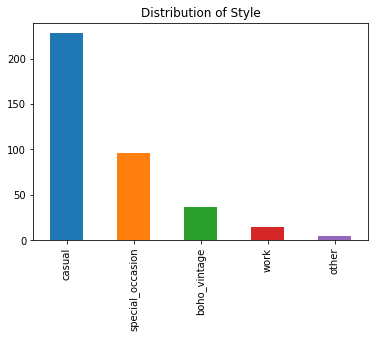

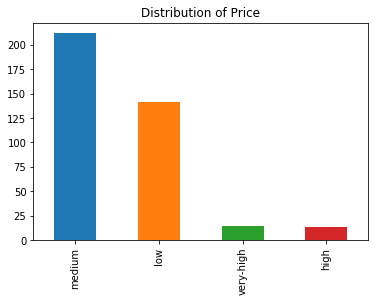

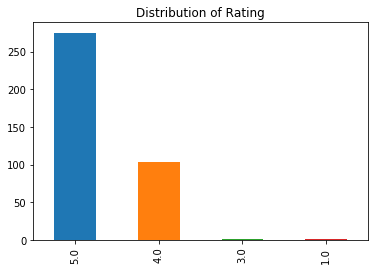

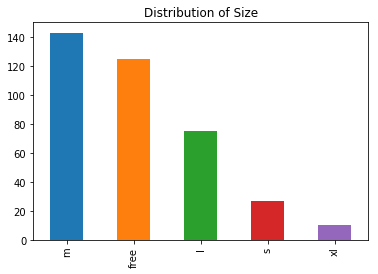

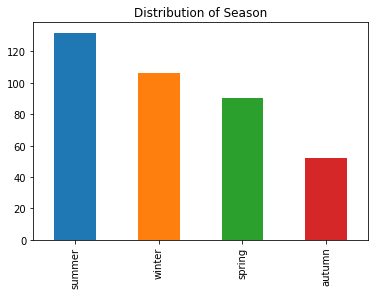

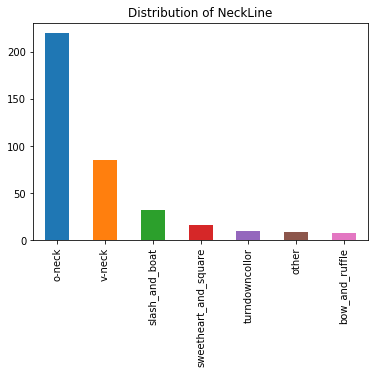

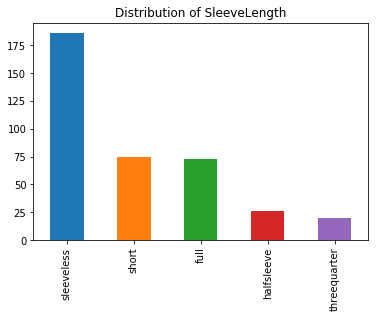

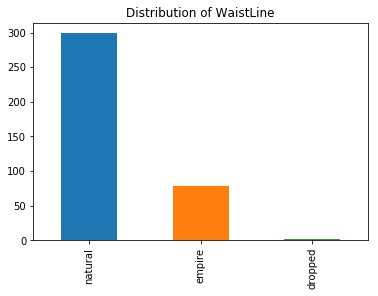

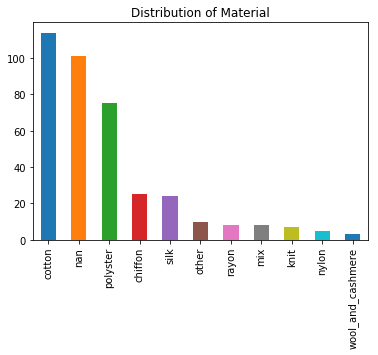

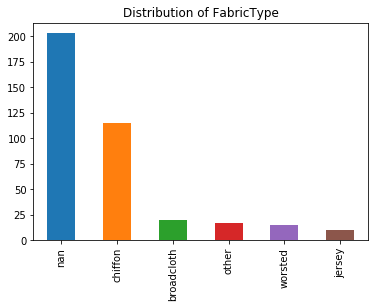

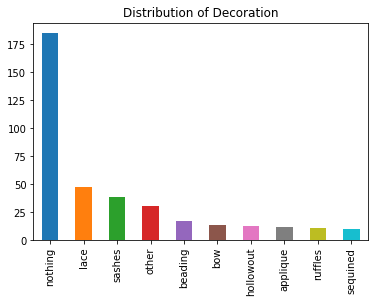

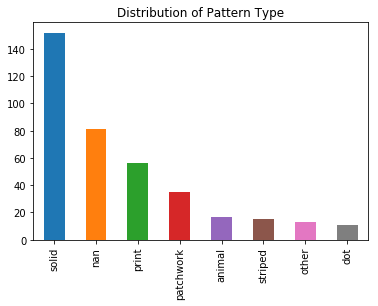

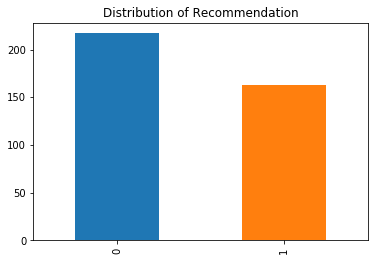

In [42]:
# check distributions again:
df = df.reset_index(drop=True)
for col in df.columns.values:
    df[col].value_counts().plot(kind='bar')
    plt.title("Distribution of " + col)
    plt.show()

In [43]:
# df["Size"].value_counts()

# # Turn Size into ordinal data
# df["Size"] = df["Size"].replace("free", "m")
# df["Size"] = df["Size"].replace("s", 0)
# df["Size"] = df["Size"].replace("m", 1)
# df["Size"] = df["Size"].replace("l", 2)
# df["Size"] = df["Size"].replace("xl", 3)

# df["Price"].value_counts()

# # Turn Price into ordinal data
# df["Price"] = df["Price"].replace("low", 0)
# df["Price"] = df["Price"].replace("medium", 1)
# df["Price"] = df["Price"].replace("high", 2)
# df["Price"] = df["Price"].replace("very-high", 3)

# df["Season"].value_counts()

# # Turn Season into ordinal data based on apparent temperature
# # summer spring autumn winter
# df["Season"] = df["Season"].replace("summer", 0)
# df["Season"] = df["Season"].replace("spring", 1)
# df["Season"] = df["Season"].replace("autumn", 2)
# df["Season"] = df["Season"].replace("winter", 3)

# df.columns

# df["WaistLine"].value_counts()

# # Turn WaistLine into ordinal data (empire as 0, natural as 1, and dropped as 2)
# df["WaistLine"] = df["WaistLine"].replace("empire", 0)
# df["WaistLine"] = df["WaistLine"].replace("natural", 1)
# df["WaistLine"] = df["WaistLine"].replace("dropped", 2)

# df["SleeveLength"].value_counts()

# # Turn SleeveLength into ordinal data
# df["SleeveLength"] = df["SleeveLength"].replace("sleeveless", 0)
# df["SleeveLength"] = df["SleeveLength"].replace("short", 1)
# df["SleeveLength"] = df["SleeveLength"].replace("halfsleeve", 2)
# df["SleeveLength"] = df["SleeveLength"].replace("threequarter", 3)
# df["SleeveLength"] = df["SleeveLength"].replace("full", 4)

In [45]:
# pd.Series(df[df.columns].apply(lambda x: x.corr(df["Recommendation"]))).sort_values(ascending=False)

In [46]:
# waiseline          66
# Material          101
# FabricType        203
# Pattern Type       81

# drop_features = ["WaistLine", "Material", "FabricType", "Pattern Type"]
# df = df.drop(columns = drop_features)

keep_features = ["Price", "Rating", "Size", "Season", "Recommendation"]
df = df[keep_features]

# keep_features = ["Price", "Rating", "Recommendation"]
# df = df[keep_features]
df.head()

,Price,Rating,Recommendation
0,low,5.0,1
1,medium,5.0,1
2,low,4.0,0
3,medium,5.0,0
4,low,5.0,1


In [47]:
# tableau needs all data also ordinal for exploration
df.to_csv("tableau_ordinal_data.csv", index=False)
# df.to_csv("clean_data.csv", index=False)

# One_hot_encoding

In [48]:
df = pd.get_dummies(df)
df.head()

,Rating,Recommendation,Price_high,Price_low,Price_medium,Price_very-high
0,5.0,1,0,1,0,0
1,5.0,1,0,0,1,0
2,4.0,0,0,1,0,0
3,5.0,0,0,0,1,0
4,5.0,1,0,1,0,0


In [49]:
df.columns.tolist()

['Rating',
 'Recommendation',
 'Price_high',
 'Price_low',
 'Price_medium',
 'Price_very-high']

In [50]:
file_path = "encoded_data.csv"
df.to_csv(file_path, index=False)

# SVC Model

In [51]:
target = df["Recommendation"]
target_names = ["negative", "positive"]

In [52]:
data = df.drop("Recommendation", axis=1)
feature_names = data.columns
data.head()

,Rating,Price_high,Price_low,Price_medium,Price_very-high
0,5.0,0,1,0,0
1,5.0,0,0,1,0
2,4.0,0,1,0,0
3,5.0,0,0,1,0
4,5.0,0,1,0,0


In [53]:
data = df.drop("Recommendation", axis=1)
feature_names = data.columns
data.head()

,Rating,Price_high,Price_low,Price_medium,Price_very-high
0,5.0,0,1,0,0
1,5.0,0,0,1,0
2,4.0,0,1,0,0
3,5.0,0,0,1,0
4,5.0,0,1,0,0


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=2018, test_size=test_size)

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [56]:
# Support vector machine linear classifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC 
model = make_pipeline(SVC(kernel='linear'))
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [57]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.500


In [58]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

   negative       0.50      1.00      0.67        19
   positive       0.00      0.00      0.00        19

avg / total       0.25      0.50      0.33        38



/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Grid Search

In [59]:
# Support vector machine linear classifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC 
model = make_pipeline(SVC(kernel='linear'))

In [60]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10],
              'svc__gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [61]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] svc__C=1, svc__gamma=0.0001 .....................................
[CV]  svc__C=1, svc__gamma=0.0001, score=0.6052631578947368, total=   0.0s
[CV] svc__C=1, svc__gamma=0.0001 .....................................
[CV]  svc__C=1, svc__gamma=0.0001, score=0.6140350877192983, total=   0.0s
[CV] svc__C=1, svc__gamma=0.0001 .....................................
[CV]  svc__C=1, svc__gamma=0.0001, score=0.5964912280701754, total=   0.0s
[CV] svc__C=1, svc__gamma=0.001 ......................................
[CV]  svc__C=1, svc__gamma=0.001, score=0.6052631578947368, total=   0.0s
[CV] svc__C=1, svc__gamma=0.001 ......................................
[CV]  svc__C=1, svc__gamma=0.001, score=0.6140350877192983, total=   0.0s
[CV] svc__C=1, svc__gamma=0.001 ......................................
[CV]  svc__C=1, svc__gamma=0.001, score=0.5964912280701754, total=   0.0s
[CV] svc__C=1, svc__gamma=0.01 ....................................

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svc__C': [1, 5, 10], 'svc__gamma': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [62]:
# List the best parameters for this dataset
print(grid.best_params_)

{'svc__C': 1, 'svc__gamma': 0.0001}


In [63]:
# List the best score
print(grid.best_score_)

0.6052631578947368


In [64]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [65]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["negative", "positive"]))

             precision    recall  f1-score   support

   negative       0.50      1.00      0.67        19
   positive       0.00      0.00      0.00        19

avg / total       0.25      0.50      0.33        38



/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Deep Learning

In [66]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

## Data Pre-Processing

In [67]:
df = pd.read_csv(os.path.join(file_path))
df.head()

df = pd.get_dummies(df)
df.head()

target = df["Recommendation"]
target_names = ["negative", "positive"]

data = df.drop("Recommendation", axis=1)
feature_names = data.columns
data.head()

data = df.drop("Recommendation", axis=1)
feature_names = data.columns
data.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=2018, test_size = test_size)

In [68]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

Using TensorFlow backend.


# Create a Deep Learning Model

In [72]:
from keras.models import Sequential
from keras.layers import Dense

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=100, activation='relu', input_dim=5))
    classifier.add(Dense(units=100, activation='relu'))
    classifier.add(Dense(units=2, activation='softmax'))
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return classifier

# Create a Keras model that's compatible with scikit-learn
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
keras_classifier = KerasClassifier(build_classifier, epochs=60, shuffle=True, verbose=2, callbacks=[EarlyStopping(monitor='acc', patience=10, verbose=2)])

In [73]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(keras_classifier)

In [74]:
model.fit(X_train, y_train_categorical)

Epoch 1/60
 - 1s - loss: 0.7442 - acc: 0.4415
Epoch 2/60
 - 0s - loss: 0.6835 - acc: 0.5848
Epoch 3/60
 - 0s - loss: 0.6725 - acc: 0.5994
Epoch 4/60
 - 0s - loss: 0.6706 - acc: 0.6140
Epoch 5/60
 - 0s - loss: 0.6677 - acc: 0.6140
Epoch 6/60
 - 0s - loss: 0.6694 - acc: 0.6140
Epoch 7/60
 - 0s - loss: 0.6638 - acc: 0.6140
Epoch 8/60
 - 0s - loss: 0.6632 - acc: 0.6140
Epoch 9/60
 - 0s - loss: 0.6622 - acc: 0.6140
Epoch 10/60
 - 0s - loss: 0.6602 - acc: 0.6140
Epoch 11/60
 - 0s - loss: 0.6590 - acc: 0.6140
Epoch 12/60
 - 0s - loss: 0.6583 - acc: 0.6140
Epoch 13/60
 - 0s - loss: 0.6676 - acc: 0.6140
Epoch 14/60
 - 0s - loss: 0.6570 - acc: 0.6140
Epoch 15/60
 - 0s - loss: 0.6578 - acc: 0.6140
Epoch 16/60
 - 0s - loss: 0.6615 - acc: 0.5877
Epoch 17/60
 - 0s - loss: 0.6603 - acc: 0.6140
Epoch 18/60
 - 0s - loss: 0.6541 - acc: 0.6140
Epoch 19/60
 - 0s - loss: 0.6572 - acc: 0.6228
Epoch 20/60
 - 0s - loss: 0.6613 - acc: 0.6170
Epoch 21/60
 - 0s - loss: 0.6686 - acc: 0.5877
Epoch 22/60
 - 0s - lo

Pipeline(memory=None,
     steps=[('kerasclassifier', <keras.wrappers.scikit_learn.KerasClassifier object at 0x1a28c9ada0>)])

## Quantify our Trained Model

In [75]:
model_loss, model_accuracy = keras_classifier.model.evaluate(X_test, y_test_categorical, verbose=2)

In [76]:
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.7224877162983543, Accuracy: 0.5263157926107708


# Saving a Trained Model
We can save our trained models using the HDF5 binary format with the extension `.h5`

In [77]:
# Save the model
keras_classifier.model.save("model_trained.h5")

# Loading a Model

In [78]:
# Load the model
from keras.models import load_model
voice_model = load_model("model_trained.h5")

## Evaluating the loaded model

In [79]:
model_loss, model_accuracy = voice_model.evaluate(X_test, y_test_categorical, verbose=2)

In [80]:
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.7224877162983543, Accuracy: 0.5263157926107708
